# Project 6 - EDA on a Custom Dataset

## Introduction

Garrett Beaver
10.4.2024

This module will showcase all the steps necessary to perform an exploratory data analysis on a data set.  It will be done in a Jupyter notebook using a standard dataset; the diamonds data set that is built into the Seaborn package.

This notebook is structured as follows:

1. Data Acquisition
2. Initial Data Inspection
3. Initial Descriptive Statistics
4. Initial Visualizations
5. Feature Engineering / Additional Visualizations
6. Conclusions and Insights


## Import modules

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
#contains data set to be analyzed
import seaborn as sns
import json
import requests

## 1. Data Acquisition  

In [62]:
# Load the diamonds dataset into DataFrame
df = sns.load_dataset('diamonds')

## 2. Intial Data Inspection


In [63]:

#first, look at the features of the data frame
print(df.head(10))




   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


In [64]:
#see how many rows and columns
print(df.shape)
#what kind of data is it
print(df.dtypes)



(53940, 10)
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [65]:
#check for missing values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


This data set is compromised of 7 numeric values and 3 categorical columns.  The data set does not require any cleaning, as there are no missing values.

## 3. Descriptive Statistics

### Numeric descriptors

In [66]:
#general description of the numeric values of this data set
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


The standard deviation fo the price is pretty wide compared to some of the other measurements.  

In [67]:
# Calculate the means of the different categorical columns
cut_mean = df.groupby('cut').mean(numeric_only=True)
print(cut_mean)

color_mean = df.groupby('color').mean(numeric_only=True)
print(color_mean)

clarity_mean = df.groupby('clarity').mean(numeric_only=True)
print(clarity_mean)

cut_color_mean = df.groupby(['cut', 'color']).mean(numeric_only=True)
print(cut_color_mean)


              carat      depth      table        price         x         y  \
cut                                                                          
Ideal      0.702837  61.709401  55.951668  3457.541970  5.507451  5.520080   
Premium    0.891955  61.264673  58.746095  4584.257704  5.973887  5.944879   
Very Good  0.806381  61.818275  57.956150  3981.759891  5.740696  5.770026   
Good       0.849185  62.365879  58.694639  3928.864452  5.838785  5.850744   
Fair       1.046137  64.041677  59.053789  4358.757764  6.246894  6.182652   

                  z  
cut                  
Ideal      3.401448  
Premium    3.647124  
Very Good  3.559801  
Good       3.639507  
Fair       3.982770  
          carat      depth      table        price         x         y  \
color                                                                    
D      0.657795  61.698125  57.404590  3169.954096  5.417051  5.421128   
E      0.657867  61.662090  57.491201  3076.752475  5.411580  5.419029   
F  

C:\Users\garrettb\AppData\Local\Temp\ipykernel_10148\2536771181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cut_mean = df.groupby('cut').mean(numeric_only=True)
C:\Users\garrettb\AppData\Local\Temp\ipykernel_10148\2536771181.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  color_mean = df.groupby('color').mean(numeric_only=True)
C:\Users\garrettb\AppData\Local\Temp\ipykernel_10148\2536771181.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

### Categorical descriptors 

In [68]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    

Unique values in carat: [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 

There are 5 values in the cut category, 7 in the color, and 8 in clarity

## 4. Initial Visualizations

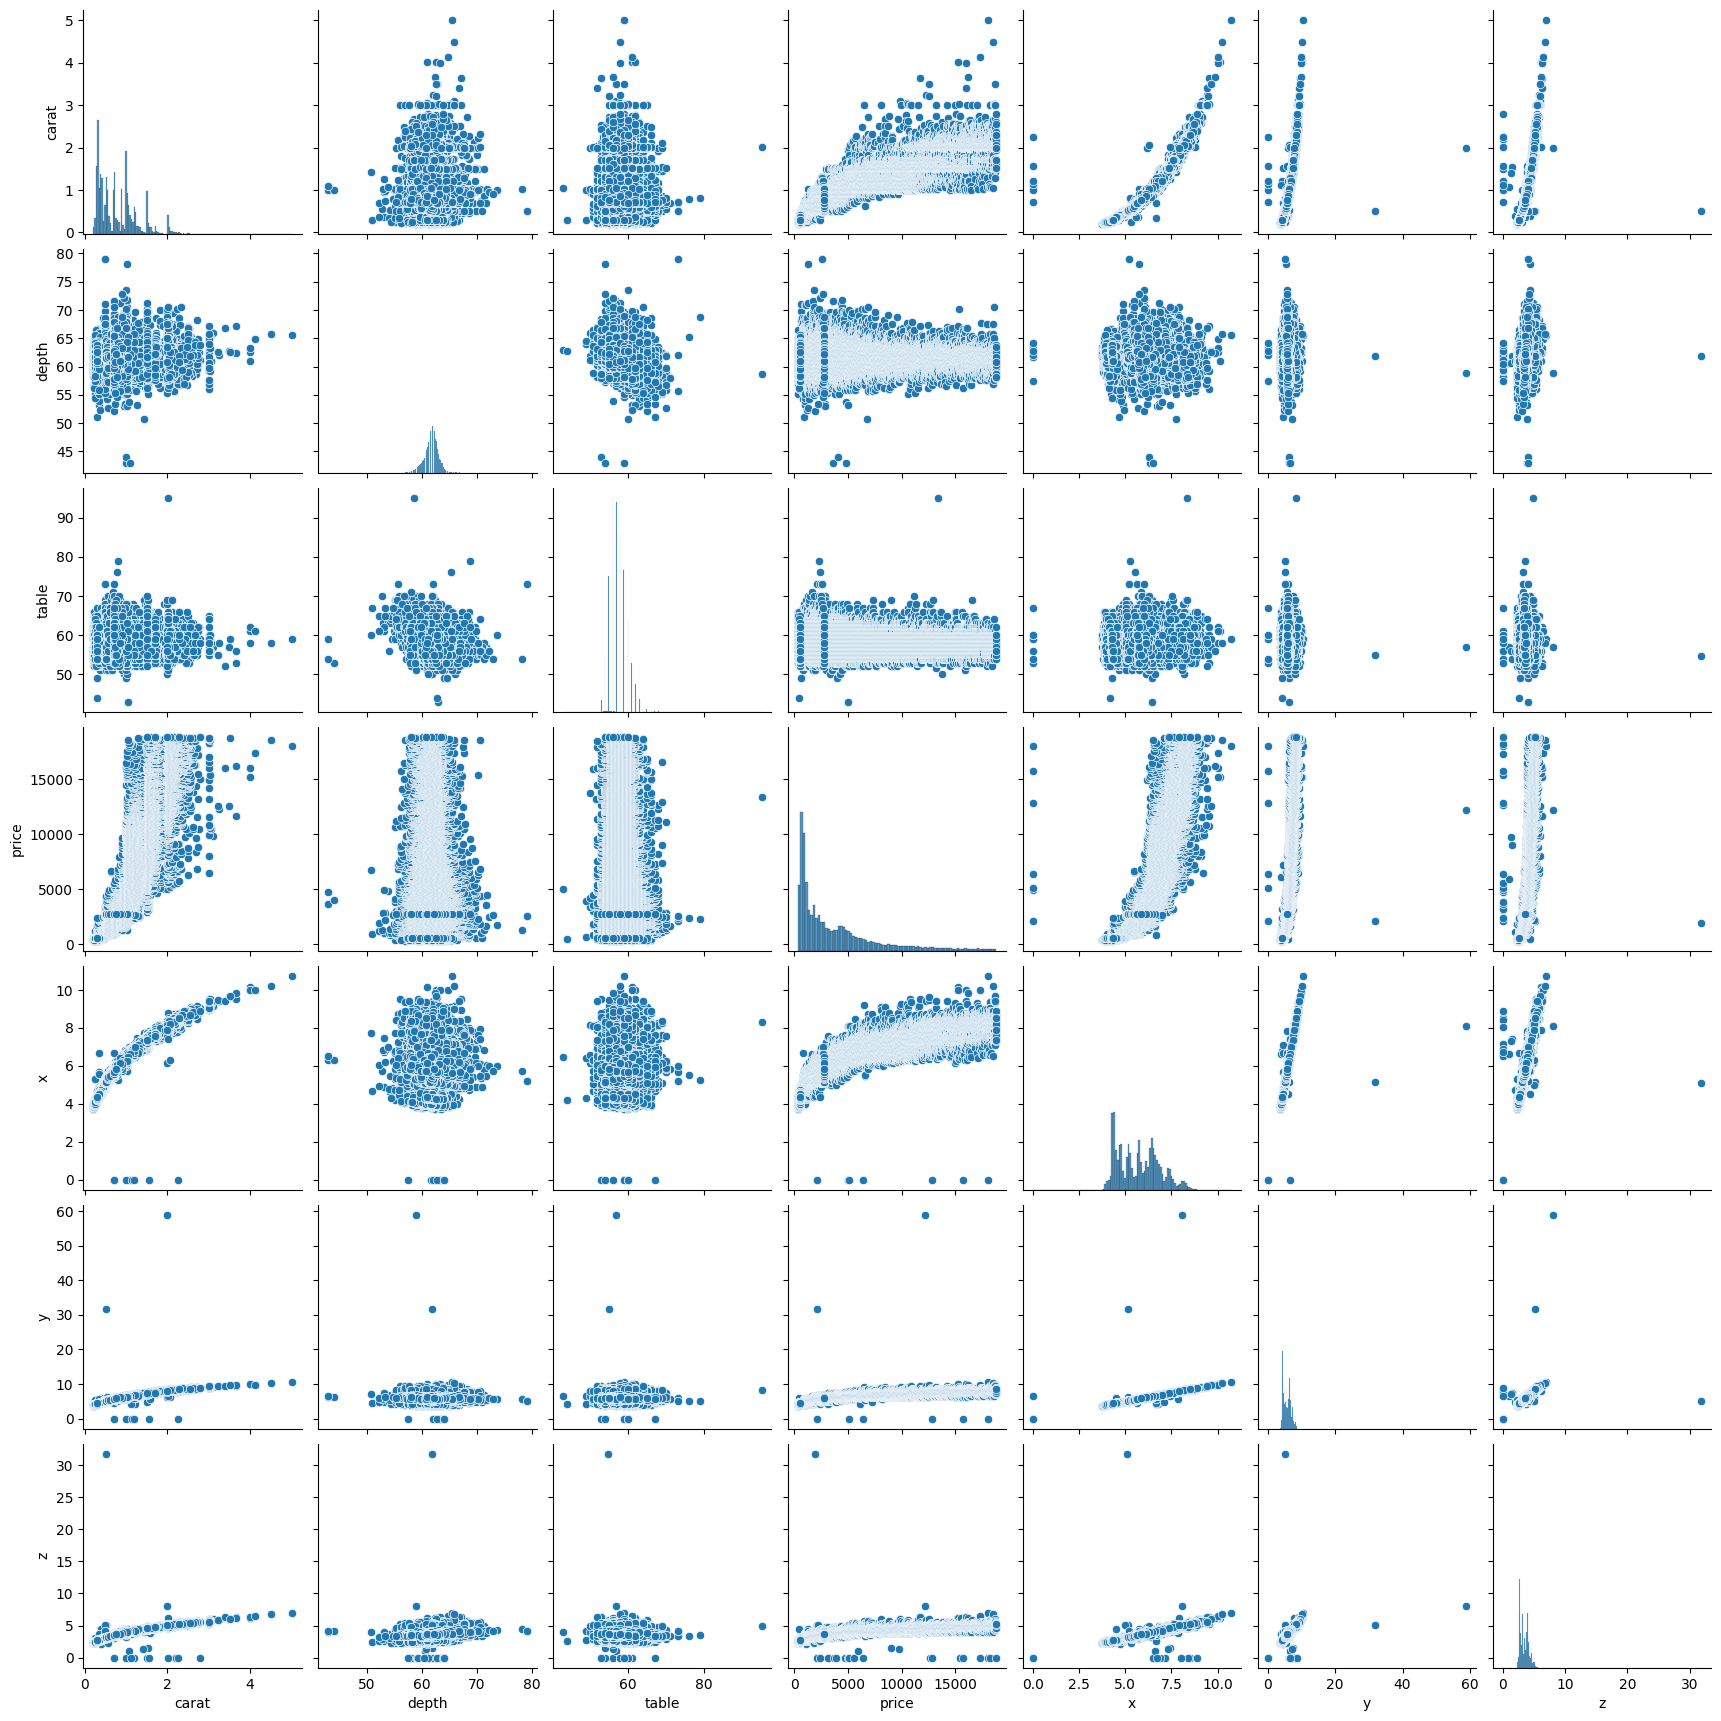

In [69]:
sns.pairplot(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.show()

This pair plot is almost to much to read, but it provides a lot of good information.  It looks like carats and price are correlated.  By exetension price and xyz are correlated.  

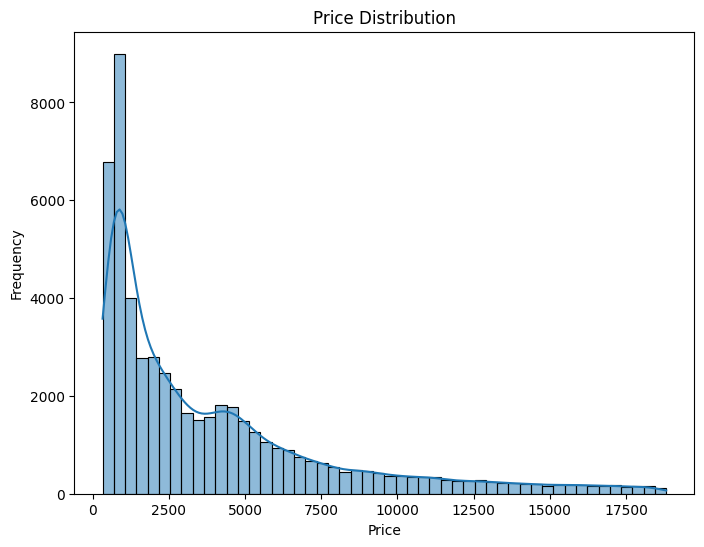

In [70]:
#Plot the price distrobution of the diamonds
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

There are a lot more low value diamonds than high value diamonds

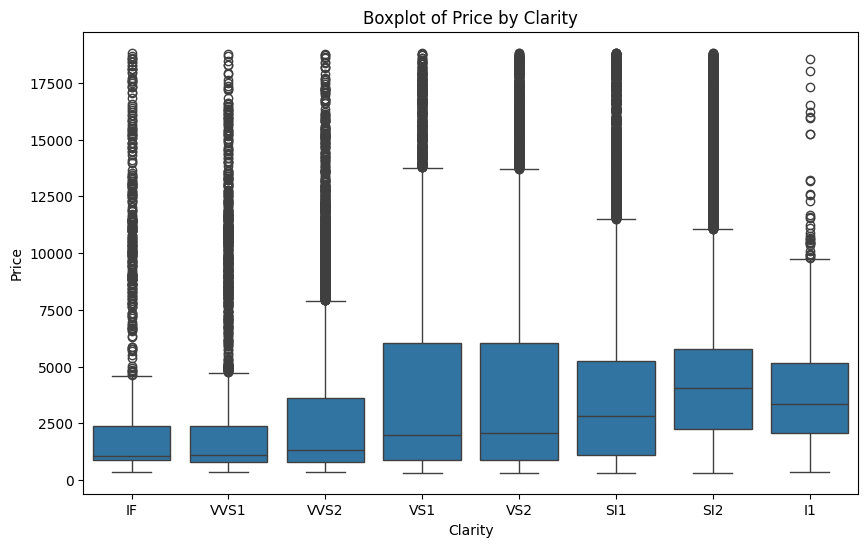

In [71]:

#clarity vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Boxplot of Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

Seems like VS1 and VS2 are worth more, with 1f being worth the least.  There is more price variance in the less clear diamonds.

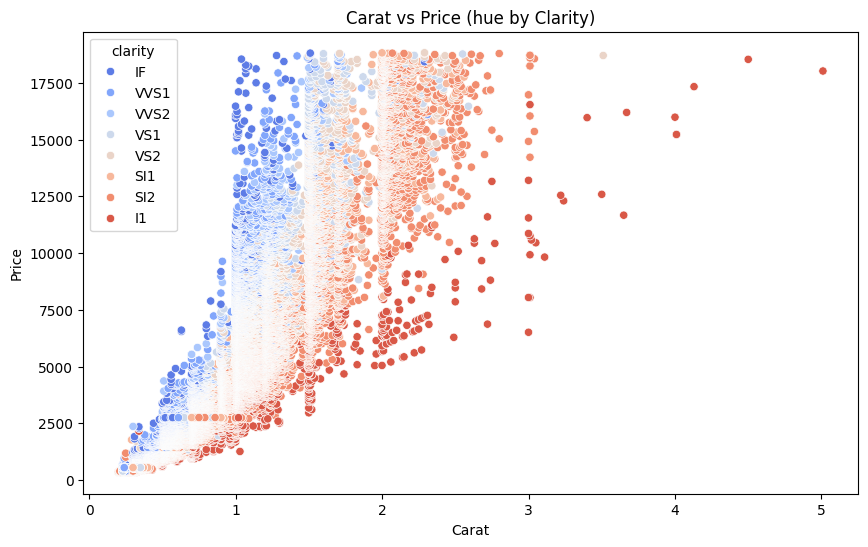

In [72]:
#carats vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='clarity', data=df, palette='coolwarm')
plt.title('Carat vs Price (hue by Clarity)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In this chart, it is clearly visible that the clarity can negatively impacts the price.

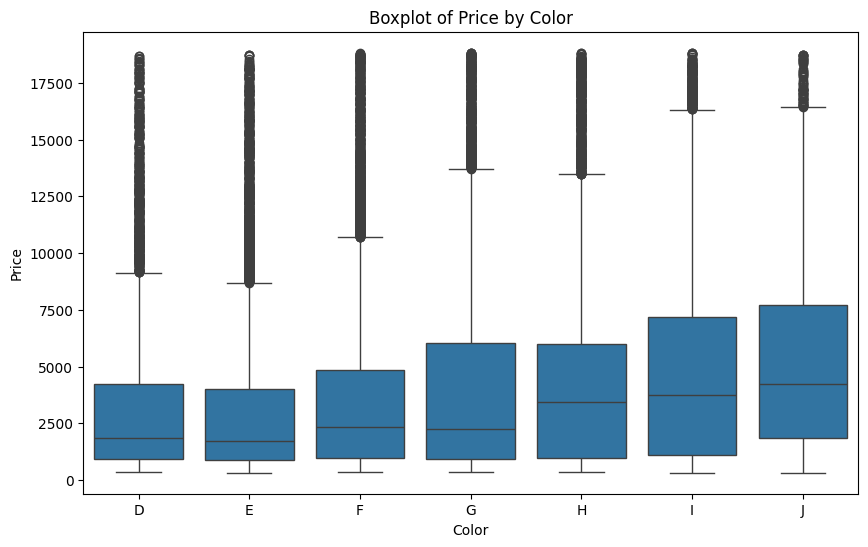

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df)
plt.title('Boxplot of Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

Worse grades of color are worth less.


In [74]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


Confirming what can be seen in the graph, there is a correlation between carats and price. The table and depth do not seem correlated with price.

## 5. Feature Engineering / Additional Visualizations

In [75]:
#rename xyz to something more clear
df = df.rename(columns={'price': 'Price (USD)','x': 'Length (mm)','y': 'Width (mm)','z': 'Depth (mm)'})
print(df.head())

   carat      cut color clarity  depth  table  Price (USD)  Length (mm)  \
0   0.23    Ideal     E     SI2   61.5   55.0          326         3.95   
1   0.21  Premium     E     SI1   59.8   61.0          326         3.89   
2   0.23     Good     E     VS1   56.9   65.0          327         4.05   
3   0.29  Premium     I     VS2   62.4   58.0          334         4.20   
4   0.31     Good     J     SI2   63.3   58.0          335         4.34   

   Width (mm)  Depth (mm)  
0        3.98        2.43  
1        3.84        2.31  
2        4.07        2.31  
3        4.23        2.63  
4        4.35        2.75  


In [76]:
#calculate volume of from xyz
df['Diamond Volume (mm^3)'] = df['Length (mm)'] * df['Width (mm)'] * df['Depth (mm)']

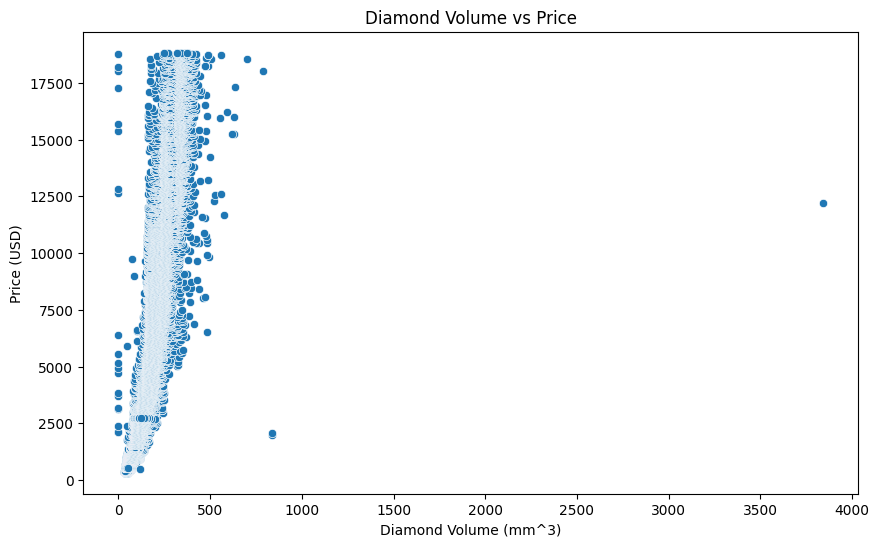

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diamond Volume (mm^3)', y='Price (USD)', data=df)
plt.title('Diamond Volume vs Price')
plt.xlabel('Diamond Volume (mm^3)')
plt.ylabel('Price (USD)')
plt.show()

Much like the weight, the price goes up with volume.

## 6. Conclusions / Insights

- The number one takeaway is that the price is heavily dependent on the weight.
- The price is also dependent on the clarity and color.
- Like the number of weight, as the volume of the diamond increases so does the price.
- This price increase is most likely do to larger size diamonds being more rare.